# UNIVERSIDAD ORT URUGUAY
**SANTIAGO BELZA - 286184**  
**VANESA ALLAN - 247079**

## Exploración de Métodos para Predicción de Tráfico Vehicular: Autorregresivos, Redes Recurrentes, Autoencoders y Modelos Basados en Grafos

### Contexto del Script de Análisis

El siguiente script en Python forma parte del proceso de análisis para la exploración de modelos de predicción de tráfico vehicular en el marco de la investigación realizada. Este script contiene las trabsformaciones realizadas al set de datos


###Importación de librerías

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

### Importación de archivos con el contenido descargado de la intendencia

In [2]:
from google.colab import drive
drive.mount("/content/drive")
#!cp "/content/drive/MyDrive/01_ORT_Master_en_Big_Data/09_Tesis/El_principio_del_fin/07_Datos/RawData/RawData.zip" "/content/"
! cp "/content/drive/My Drive/MasterBigData/RawData.zip" .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip RawData.zip

Archive:  RawData.zip
replace MaestroSensores_11_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: MaestroSensores_11_2023.csv  
replace Velocidad_09_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Velocidad_09_2023.csv   
  inflating: Velocidad_10_2023.csv   
  inflating: Velocidad_11_2023.csv   
  inflating: Volumen_09_2023.csv     
  inflating: Volumen_10_2023.csv     
  inflating: Volumen_11_2023.csv     


In [4]:
velocidad1 = pd.read_csv('Velocidad_09_2023.csv')

In [5]:
velocidad2 = pd.read_csv('Velocidad_10_2023.csv')

### Unificación de dos meses en un único dataset para train

In [6]:
velocidad = pd.concat([velocidad1, velocidad2])


In [7]:
velocidad

,cod_detector,id_carril,fecha,hora,dsc_avenida,dsc_int_anterior,dsc_int_siguiente,latitud,longitud,velocidad
0,206,1,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0.0
1,214,3,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0.0
2,205,2,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0.0
3,206,1,2023-09-01,23:55:00.0,Bv Batlle y Ordonez,Joanico,8 de Octubre,-34.878960,-56.148300,37.0
4,306,1,2023-09-01,23:55:00.0,Bv Batlle y Ordonez,Cabrera,8 de Octubre,-34.879770,-56.147220,37.0
...,...,...,...,...,...,...,...,...,...,...
3652980,205,1,2023-10-31,00:00:00.0,Agraciada,Grito de Asencio,Bv Artigas,-34.873261,-56.201531,49.0
3652981,206,1,2023-10-31,00:00:00.0,Uruguayana,Capurro,Bv Artigas,-34.872699,-56.205994,28.0
3652982,107,1,2023-10-31,00:00:00.0,Agraciada,Hermanos Gil,Bv Artigas,-34.871494,-56.202848,53.0
3652983,107,1,2023-10-31,00:00:00.0,Soca,Gestido,Rivera,-34.903760,-56.155750,44.0


In [8]:
volumen1 = pd.read_csv('Volumen_09_2023.csv')
volumen2 = pd.read_csv('Volumen_10_2023.csv')

In [9]:
volumen = pd.concat([volumen1, volumen2])

In [10]:
volumen

,cod_detector,id_carril,fecha,hora,dsc_avenida,dsc_int_anterior,dsc_int_siguiente,latitud,longitud,volume,volumen_hora
0,205,2,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0,0.0
1,206,1,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0,0.0
2,214,3,2023-09-01,23:55:15.0,Rambla,Sarmiento,Errazquin,-34.929158,-56.160908,0,0.0
3,109,2,2023-09-01,23:55:00.0,Bv Artigas,Palmar,Canaro,-34.899594,-56.164421,27,324.0
4,306,2,2023-09-01,23:55:00.0,Rivera,Bv Artigas,Ponce,-34.902720,-56.162320,4,48.0
...,...,...,...,...,...,...,...,...,...,...,...
3652980,110,9,2023-10-31,00:00:00.0,San Quintin,Santa Lucia,Garzon,-34.852648,-56.223283,1,12.0
3652981,110,9,2023-10-31,00:00:00.0,Garzon,San Quintin N,Emancipacion,-34.850334,-56.223620,5,60.0
3652982,216,9,2023-10-31,00:00:00.0,Garzon,Casavalle,Saravia,-34.814485,-56.220677,1,12.0
3652983,121,12,2023-10-31,00:00:00.0,Bv Artigas,Ponce,Canelones,-34.906600,-56.163642,20,240.0


### Eliminación de los campos que no se utilizarán en el análisis

In [11]:
volumen = volumen.drop(columns=['id_carril', 'cod_detector' ])
velocidad = velocidad.drop(columns=['id_carril', 'cod_detector'])

###Transformaciones de tipo de campos

In [12]:
velocidad['FechaHora'] = velocidad['fecha'] + ' ' + velocidad['hora']
velocidad['FechaHora'] = pd.to_datetime(velocidad['FechaHora'])

In [13]:
volumen['FechaHora'] = volumen['fecha'] + ' ' + volumen['hora']
volumen['FechaHora'] = pd.to_datetime(volumen['FechaHora'])


In [14]:
velocidad['latitud'] = velocidad['latitud'].astype('string')
velocidad['longitud'] = velocidad['longitud'].astype('string')

In [15]:
volumen['latitud'] = volumen['latitud'].astype('string')
volumen['longitud'] = volumen['longitud'].astype('string')

### Agrupación de datos en intervalos de 15 minutos

#### Media de la velocidad

In [16]:
velocidad_agrupada = velocidad.groupby(['dsc_avenida', 'dsc_int_anterior', 'dsc_int_siguiente', 'latitud', 'longitud', pd.Grouper(key='FechaHora', freq='15Min')]).agg(velocidad_agrupada=('velocidad', 'mean')).reset_index()


#### Suma del volumen

In [17]:
volumen_agrupada = volumen.groupby(['dsc_avenida', 'dsc_int_anterior', 'dsc_int_siguiente', 'latitud', 'longitud', pd.Grouper(key='FechaHora', freq='15Min')]).agg(volumen_agrupada=('volume', 'sum')).reset_index()


In [18]:
volumen_agrupada

,dsc_avenida,dsc_int_anterior,dsc_int_siguiente,latitud,longitud,FechaHora,volumen_agrupada
0,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:00:00,0
1,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:15:00,160
2,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:30:00,292
3,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:45:00,271
4,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 16:00:00,256
...,...,...,...,...,...,...,...
1213978,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 22:45:00,22
1213979,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:00:00,26
1213980,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:15:00,19
1213981,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:30:00,14


### Creación de las claves para cada sensor en cada instante de tiempo

In [19]:
volumen_agrupada['key'] = volumen_agrupada['latitud'] + volumen_agrupada['longitud'] + volumen_agrupada['FechaHora'].astype('string')

In [20]:
velocidad_agrupada['key'] = velocidad_agrupada['latitud'] + velocidad_agrupada['longitud'] + velocidad_agrupada['FechaHora'].astype('string')

In [21]:
velocidad_agrupada

,dsc_avenida,dsc_int_anterior,dsc_int_siguiente,latitud,longitud,FechaHora,velocidad_agrupada,key
0,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:00:00,0.000000,-34.897926-56.1654342023-10-03 15:00:00
1,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:15:00,32.666667,-34.897926-56.1654342023-10-03 15:15:00
2,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:30:00,28.555556,-34.897926-56.1654342023-10-03 15:30:00
3,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:45:00,26.000000,-34.897926-56.1654342023-10-03 15:45:00
4,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 16:00:00,28.000000,-34.897926-56.1654342023-10-03 16:00:00
...,...,...,...,...,...,...,...,...
1213978,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 22:45:00,25.000000,-34.862684-56.2122482023-10-31 22:45:00
1213979,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:00:00,25.333333,-34.862684-56.2122482023-10-31 23:00:00
1213980,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:15:00,25.000000,-34.862684-56.2122482023-10-31 23:15:00
1213981,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:30:00,29.333333,-34.862684-56.2122482023-10-31 23:30:00


### Union de la velocidad y volumen en un mismo dataset

In [22]:
data_transito = velocidad_agrupada.merge(volumen_agrupada, how='inner', on='key')


### Eliminación de claves duplicadas

In [23]:
data_transito = data_transito[['dsc_avenida_x', 'dsc_int_anterior_x', 'dsc_int_siguiente_x', 'latitud_x', 'longitud_x', 'FechaHora_x', 'velocidad_agrupada', 'volumen_agrupada','key']]


In [24]:
data_transito = data_transito.drop_duplicates(subset='key', keep='first')

In [25]:
data_transito.groupby('key').size().to_frame(name=0).reset_index().rename(columns={0:'count'}).query('count > 1')


,key,count


In [26]:
data_transito

,dsc_avenida_x,dsc_int_anterior_x,dsc_int_siguiente_x,latitud_x,longitud_x,FechaHora_x,velocidad_agrupada,volumen_agrupada,key
0,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:00:00,0.000000,0,-34.897926-56.1654342023-10-03 15:00:00
1,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:15:00,32.666667,160,-34.897926-56.1654342023-10-03 15:15:00
2,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:30:00,28.555556,292,-34.897926-56.1654342023-10-03 15:30:00
3,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 15:45:00,26.000000,271,-34.897926-56.1654342023-10-03 15:45:00
4,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-10-03 16:00:00,28.000000,256,-34.897926-56.1654342023-10-03 16:00:00
...,...,...,...,...,...,...,...,...,...
1225690,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 22:45:00,25.000000,22,-34.862684-56.2122482023-10-31 22:45:00
1225691,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:00:00,25.333333,26,-34.862684-56.2122482023-10-31 23:00:00
1225692,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:15:00,25.000000,19,-34.862684-56.2122482023-10-31 23:15:00
1225693,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:30:00,29.333333,14,-34.862684-56.2122482023-10-31 23:30:00


In [27]:
latitudes_longitudes = data_transito[['latitud_x', 'longitud_x','dsc_avenida_x']].drop_duplicates()


### Generación de instantes de tiempos teorícos a utilizar en el entrenamiento

In [28]:
rango_fechas_esperadas = pd.date_range(start="2023-09-01", end="2023-11-01", freq="15min")

df_fechas_esperadas = pd.DataFrame(rango_fechas_esperadas, columns=["fechahora"])

cross_join = pd.merge(latitudes_longitudes, df_fechas_esperadas, how="cross")

cross_join


,latitud_x,longitud_x,dsc_avenida_x,fechahora
0,-34.897926,-56.165434,18 de Julio,2023-09-01 00:00:00
1,-34.897926,-56.165434,18 de Julio,2023-09-01 00:15:00
2,-34.897926,-56.165434,18 de Julio,2023-09-01 00:30:00
3,-34.897926,-56.165434,18 de Julio,2023-09-01 00:45:00
4,-34.897926,-56.165434,18 de Julio,2023-09-01 01:00:00
...,...,...,...,...
1247536,-34.862684,-56.212248,Zufriategui,2023-10-31 23:00:00
1247537,-34.862684,-56.212248,Zufriategui,2023-10-31 23:15:00
1247538,-34.862684,-56.212248,Zufriategui,2023-10-31 23:30:00
1247539,-34.862684,-56.212248,Zufriategui,2023-10-31 23:45:00


### Incorporación de los datos faltantes en base al teoríco por intervalo temporal

In [29]:
cross_join['key'] = cross_join['latitud_x'] + cross_join['longitud_x'] + cross_join['fechahora'].astype('string')

In [30]:
data_transito_merge = pd.merge(cross_join, data_transito, how='left', on='key')
data_transito_merge[['velocidad_agrupada', 'volumen_agrupada']] = data_transito_merge[['velocidad_agrupada', 'volumen_agrupada']].fillna(0)
data_transito_merge


,latitud_x_x,longitud_x_x,dsc_avenida_x_x,fechahora,key,dsc_avenida_x_y,dsc_int_anterior_x,dsc_int_siguiente_x,latitud_x_y,longitud_x_y,FechaHora_x,velocidad_agrupada,volumen_agrupada
0,-34.897926,-56.165434,18 de Julio,2023-09-01 00:00:00,-34.897926-56.1654342023-09-01 00:00:00,NaN,NaN,NaN,<NA>,<NA>,NaT,0.000000,0.0
1,-34.897926,-56.165434,18 de Julio,2023-09-01 00:15:00,-34.897926-56.1654342023-09-01 00:15:00,NaN,NaN,NaN,<NA>,<NA>,NaT,0.000000,0.0
2,-34.897926,-56.165434,18 de Julio,2023-09-01 00:30:00,-34.897926-56.1654342023-09-01 00:30:00,NaN,NaN,NaN,<NA>,<NA>,NaT,0.000000,0.0
3,-34.897926,-56.165434,18 de Julio,2023-09-01 00:45:00,-34.897926-56.1654342023-09-01 00:45:00,NaN,NaN,NaN,<NA>,<NA>,NaT,0.000000,0.0
4,-34.897926,-56.165434,18 de Julio,2023-09-01 01:00:00,-34.897926-56.1654342023-09-01 01:00:00,NaN,NaN,NaN,<NA>,<NA>,NaT,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247536,-34.862684,-56.212248,Zufriategui,2023-10-31 23:00:00,-34.862684-56.2122482023-10-31 23:00:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:00:00,25.333333,26.0
1247537,-34.862684,-56.212248,Zufriategui,2023-10-31 23:15:00,-34.862684-56.2122482023-10-31 23:15:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:15:00,25.000000,19.0
1247538,-34.862684,-56.212248,Zufriategui,2023-10-31 23:30:00,-34.862684-56.2122482023-10-31 23:30:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:30:00,29.333333,14.0
1247539,-34.862684,-56.212248,Zufriategui,2023-10-31 23:45:00,-34.862684-56.2122482023-10-31 23:45:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-10-31 23:45:00,21.666667,8.0


In [31]:
data_transito_merge_filtrado = data_transito_merge[['latitud_x_x','longitud_x_x','fechahora','velocidad_agrupada','volumen_agrupada','dsc_avenida_x_x']]
data_transito_merge_filtrado.rename(columns={'fechahora':'FechaHora'}, inplace=True)

data_transito_merge_filtrado.columns = data_transito_merge_filtrado.columns.str.replace('_x_x', '')

data_transito_merge_filtrado


<ipython-input-31-b643dde016b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transito_merge_filtrado.rename(columns={'fechahora':'FechaHora'}, inplace=True)


,latitud,longitud,FechaHora,velocidad_agrupada,volumen_agrupada,dsc_avenida
0,-34.897926,-56.165434,2023-09-01 00:00:00,0.000000,0.0,18 de Julio
1,-34.897926,-56.165434,2023-09-01 00:15:00,0.000000,0.0,18 de Julio
2,-34.897926,-56.165434,2023-09-01 00:30:00,0.000000,0.0,18 de Julio
3,-34.897926,-56.165434,2023-09-01 00:45:00,0.000000,0.0,18 de Julio
4,-34.897926,-56.165434,2023-09-01 01:00:00,0.000000,0.0,18 de Julio
...,...,...,...,...,...,...
1247536,-34.862684,-56.212248,2023-10-31 23:00:00,25.333333,26.0,Zufriategui
1247537,-34.862684,-56.212248,2023-10-31 23:15:00,25.000000,19.0,Zufriategui
1247538,-34.862684,-56.212248,2023-10-31 23:30:00,29.333333,14.0,Zufriategui
1247539,-34.862684,-56.212248,2023-10-31 23:45:00,21.666667,8.0,Zufriategui


### Completado de los intervalos de tiempos en base al teoríco en los datos de validación

In [32]:
velocidad_val = pd.read_csv('Velocidad_11_2023.csv')
volumen_val = pd.read_csv('Volumen_11_2023.csv')

velocidad_val = velocidad_val.drop(columns=['id_carril', 'cod_detector'])
volumen_val = volumen_val.drop(columns=['id_carril', 'cod_detector'])

velocidad_val['FechaHora'] = velocidad_val['fecha'] + ' ' + velocidad_val['hora']
velocidad_val['FechaHora'] = pd.to_datetime(velocidad_val['FechaHora'])
velocidad_val['latitud'] = velocidad_val['latitud'].astype('string')
velocidad_val['longitud'] = velocidad_val['longitud'].astype('string')

volumen_val['FechaHora'] = volumen_val['fecha'] + ' ' + volumen_val['hora']
volumen_val['FechaHora'] = pd.to_datetime(volumen_val['FechaHora'])
volumen_val['latitud'] = volumen_val['latitud'].astype('string')
volumen_val['longitud'] = volumen_val['longitud'].astype('string')


velocidad_val_agrupada = velocidad_val.groupby(['dsc_avenida', 'dsc_int_anterior', 'dsc_int_siguiente', 'latitud', 'longitud', pd.Grouper(key='FechaHora', freq='15Min')]).agg(velocidad_agrupada=('velocidad', 'mean')).reset_index()

volumen_val_agrupada = volumen_val.groupby(['dsc_avenida', 'dsc_int_anterior', 'dsc_int_siguiente', 'latitud', 'longitud', pd.Grouper(key='FechaHora', freq='15Min')]).agg(volumen_agrupada=('volume', 'sum')).reset_index()


In [33]:
volumen_val_agrupada['key'] = volumen_val_agrupada['latitud'] + volumen_val_agrupada['longitud'] + volumen_val_agrupada['FechaHora'].astype('string')

velocidad_val_agrupada['key'] = velocidad_val_agrupada['latitud'] + velocidad_val_agrupada['longitud'] + velocidad_val_agrupada['FechaHora'].astype('string')


data_val_transito = velocidad_val_agrupada.merge(volumen_val_agrupada, how='inner', on='key')

data_val_transito = data_val_transito[['dsc_avenida_x', 'dsc_int_anterior_x', 'dsc_int_siguiente_x', 'latitud_x', 'longitud_x', 'FechaHora_x', 'velocidad_agrupada', 'volumen_agrupada','key']]


In [34]:
data_val_transito.groupby('key').size().to_frame(name=0).reset_index().rename(columns={0:'count'}).query('count > 1')

data_val_transito = data_val_transito.drop_duplicates(subset='key', keep='first')


In [35]:
rango_fechas_esperadas = pd.date_range(start="2023-11-01", end="2023-12-01", freq="15min")


df_fechas_esperadas = pd.DataFrame(rango_fechas_esperadas, columns=["fechahora"])

latitudes_longitudes_val = data_val_transito[['latitud_x', 'longitud_x','dsc_avenida_x']].drop_duplicates()


cross_join = pd.merge(latitudes_longitudes_val, df_fechas_esperadas, how="cross")

cross_join['key'] = cross_join['latitud_x'] + cross_join['longitud_x'] + cross_join['fechahora'].astype('string')


data_val_transito_merge = pd.merge(cross_join, data_val_transito, how='left', on='key')
data_val_transito_merge[['velocidad_agrupada', 'volumen_agrupada']] = data_val_transito_merge[['velocidad_agrupada', 'volumen_agrupada']].fillna(0)
data_val_transito_merge

,latitud_x_x,longitud_x_x,dsc_avenida_x_x,fechahora,key,dsc_avenida_x_y,dsc_int_anterior_x,dsc_int_siguiente_x,latitud_x_y,longitud_x_y,FechaHora_x,velocidad_agrupada,volumen_agrupada
0,-34.897926,-56.165434,18 de Julio,2023-11-01 00:00:00,-34.897926-56.1654342023-11-01 00:00:00,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-11-01 00:00:00,29.666667,53.0
1,-34.897926,-56.165434,18 de Julio,2023-11-01 00:15:00,-34.897926-56.1654342023-11-01 00:15:00,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-11-01 00:15:00,25.888889,38.0
2,-34.897926,-56.165434,18 de Julio,2023-11-01 00:30:00,-34.897926-56.1654342023-11-01 00:30:00,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-11-01 00:30:00,37.888889,42.0
3,-34.897926,-56.165434,18 de Julio,2023-11-01 00:45:00,-34.897926-56.1654342023-11-01 00:45:00,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-11-01 00:45:00,31.333333,25.0
4,-34.897926,-56.165434,18 de Julio,2023-11-01 01:00:00,-34.897926-56.1654342023-11-01 01:00:00,18 de Julio,8 de Octubre,Bv Artigas,-34.897926,-56.165434,2023-11-01 01:00:00,29.555556,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616529,-34.862684,-56.212248,Zufriategui,2023-11-30 23:00:00,-34.862684-56.2122482023-11-30 23:00:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-11-30 23:00:00,28.000000,11.0
616530,-34.862684,-56.212248,Zufriategui,2023-11-30 23:15:00,-34.862684-56.2122482023-11-30 23:15:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-11-30 23:15:00,19.666667,7.0
616531,-34.862684,-56.212248,Zufriategui,2023-11-30 23:30:00,-34.862684-56.2122482023-11-30 23:30:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-11-30 23:30:00,40.333333,7.0
616532,-34.862684,-56.212248,Zufriategui,2023-11-30 23:45:00,-34.862684-56.2122482023-11-30 23:45:00,Zufriategui,Coraceros,Agraciada,-34.862684,-56.212248,2023-11-30 23:45:00,17.333333,3.0


In [36]:
data_val_transito_merge_filtrado = data_val_transito_merge[['latitud_x_x','longitud_x_x','fechahora','velocidad_agrupada','volumen_agrupada','dsc_avenida_x_x']]
data_val_transito_merge_filtrado.rename(columns={'fechahora':'FechaHora'}, inplace=True)
data_val_transito_merge_filtrado.columns = data_val_transito_merge_filtrado.columns.str.replace('_x_x', '')

data_val_transito_merge_filtrado

<ipython-input-36-a61d5e7b30d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val_transito_merge_filtrado.rename(columns={'fechahora':'FechaHora'}, inplace=True)


,latitud,longitud,FechaHora,velocidad_agrupada,volumen_agrupada,dsc_avenida
0,-34.897926,-56.165434,2023-11-01 00:00:00,29.666667,53.0,18 de Julio
1,-34.897926,-56.165434,2023-11-01 00:15:00,25.888889,38.0,18 de Julio
2,-34.897926,-56.165434,2023-11-01 00:30:00,37.888889,42.0,18 de Julio
3,-34.897926,-56.165434,2023-11-01 00:45:00,31.333333,25.0,18 de Julio
4,-34.897926,-56.165434,2023-11-01 01:00:00,29.555556,27.0,18 de Julio
...,...,...,...,...,...,...
616529,-34.862684,-56.212248,2023-11-30 23:00:00,28.000000,11.0,Zufriategui
616530,-34.862684,-56.212248,2023-11-30 23:15:00,19.666667,7.0,Zufriategui
616531,-34.862684,-56.212248,2023-11-30 23:30:00,40.333333,7.0,Zufriategui
616532,-34.862684,-56.212248,2023-11-30 23:45:00,17.333333,3.0,Zufriategui


In [37]:
data_transito_merge_filtrado['key'] = data_transito_merge_filtrado['latitud'] + data_transito_merge_filtrado['longitud']
data_val_transito_merge_filtrado['key'] = data_val_transito_merge_filtrado['latitud'] + data_val_transito_merge_filtrado['longitud']

union_lat_val = pd.DataFrame(data_val_transito_merge_filtrado['key'].unique(), columns=['key'])
union_lat = pd.DataFrame(data_transito_merge_filtrado['key'].unique(), columns=['key'])

union_lat_long = pd.merge(union_lat, union_lat_val, on='key', how='inner')

union_lat_long

<ipython-input-37-543812675d31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transito_merge_filtrado['key'] = data_transito_merge_filtrado['latitud'] + data_transito_merge_filtrado['longitud']
<ipython-input-37-543812675d31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val_transito_merge_filtrado['key'] = data_val_transito_merge_filtrado['latitud'] + data_val_transito_merge_filtrado['longitud']


,key
0,-34.897926-56.165434
1,-34.912363-56.164099
2,-34.913284-56.162377
3,-34.905258-56.134153
4,-34.905612-56.135593
...,...
201,-34.902768-56.186559
202,-34.8736-56.204285
203,-34.872699-56.205994
204,-34.905242-56.188052


In [38]:
data_transito_merge_filtrado = data_transito_merge_filtrado[data_transito_merge_filtrado['key'].isin(union_lat_long['key'].tolist())]
data_val_transito_merge_filtrado = data_val_transito_merge_filtrado[data_val_transito_merge_filtrado['key'].isin(union_lat_long['key'].tolist())]

In [39]:
unique_lat_long_val = data_val_transito_merge_filtrado[['latitud', 'longitud']].drop_duplicates()
unique_lat_long = data_transito_merge_filtrado[['latitud', 'longitud']].drop_duplicates()
print("Número de latitudes y longitudes diferentes en data_val_transito_merge_filtrado:", len(unique_lat_long_val))
print("Número de latitudes y longitudes diferentes en data_transito_merge_filtrado:", len(unique_lat_long))

Número de latitudes y longitudes diferentes en data_val_transito_merge_filtrado: 206
Número de latitudes y longitudes diferentes en data_transito_merge_filtrado: 206


### Clusterización con k-medias en base a su distancia geográfica.

In [40]:
from sklearn.cluster import KMeans
datos_agrupacion = unique_lat_long_val[['latitud', 'longitud']]

num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
unique_lat_long_val['zona'] = kmeans.fit_predict(datos_agrupacion)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
unique_lat_long_val

,latitud,longitud,zona
0,-34.897926,-56.165434,2
2881,-34.912363,-56.164099,2
5762,-34.913284,-56.162377,2
8643,-34.905258,-56.134153,5
11524,-34.905612,-56.135593,5
...,...,...,...
602129,-34.902768,-56.186559,3
605010,-34.8736,-56.204285,3
607891,-34.872699,-56.205994,3
610772,-34.905242,-56.188052,3


### Incorporación de la zona en el dataset.

In [42]:
data_transito_merge_filtrado = pd.merge(data_transito_merge_filtrado, unique_lat_long_val, how='left', on=['latitud', 'longitud'])
data_val_transito_merge_filtrado = pd.merge(data_val_transito_merge_filtrado, unique_lat_long_val, how='left', on=['latitud', 'longitud'])


data_val_transito_merge_filtrado

,latitud,longitud,FechaHora,velocidad_agrupada,volumen_agrupada,dsc_avenida,key,zona
0,-34.897926,-56.165434,2023-11-01 00:00:00,29.666667,53.0,18 de Julio,-34.897926-56.165434,2
1,-34.897926,-56.165434,2023-11-01 00:15:00,25.888889,38.0,18 de Julio,-34.897926-56.165434,2
2,-34.897926,-56.165434,2023-11-01 00:30:00,37.888889,42.0,18 de Julio,-34.897926-56.165434,2
3,-34.897926,-56.165434,2023-11-01 00:45:00,31.333333,25.0,18 de Julio,-34.897926-56.165434,2
4,-34.897926,-56.165434,2023-11-01 01:00:00,29.555556,27.0,18 de Julio,-34.897926-56.165434,2
...,...,...,...,...,...,...,...,...
593481,-34.862684,-56.212248,2023-11-30 23:00:00,28.000000,11.0,Zufriategui,-34.862684-56.212248,1
593482,-34.862684,-56.212248,2023-11-30 23:15:00,19.666667,7.0,Zufriategui,-34.862684-56.212248,1
593483,-34.862684,-56.212248,2023-11-30 23:30:00,40.333333,7.0,Zufriategui,-34.862684-56.212248,1
593484,-34.862684,-56.212248,2023-11-30 23:45:00,17.333333,3.0,Zufriategui,-34.862684-56.212248,1


### Generación de los CSV inputs de los modelos.

In [43]:
data_transito_merge_filtrado.to_csv('Datos_transito.csv', index=False)
data_val_transito_merge_filtrado.to_csv('data_val_transito.csv', index=False)

In [44]:
data_transito_merge_filtrado.groupby('zona')['key'].nunique()


zona
0    38
1    20
2    67
3    47
4     7
5    27
Name: key, dtype: int64

In [45]:
data_transito_merge_filtrado

,latitud,longitud,FechaHora,velocidad_agrupada,volumen_agrupada,dsc_avenida,key,zona
0,-34.897926,-56.165434,2023-09-01 00:00:00,0.000000,0.0,18 de Julio,-34.897926-56.165434,2
1,-34.897926,-56.165434,2023-09-01 00:15:00,0.000000,0.0,18 de Julio,-34.897926-56.165434,2
2,-34.897926,-56.165434,2023-09-01 00:30:00,0.000000,0.0,18 de Julio,-34.897926-56.165434,2
3,-34.897926,-56.165434,2023-09-01 00:45:00,0.000000,0.0,18 de Julio,-34.897926-56.165434,2
4,-34.897926,-56.165434,2023-09-01 01:00:00,0.000000,0.0,18 de Julio,-34.897926-56.165434,2
...,...,...,...,...,...,...,...,...
1206537,-34.862684,-56.212248,2023-10-31 23:00:00,25.333333,26.0,Zufriategui,-34.862684-56.212248,1
1206538,-34.862684,-56.212248,2023-10-31 23:15:00,25.000000,19.0,Zufriategui,-34.862684-56.212248,1
1206539,-34.862684,-56.212248,2023-10-31 23:30:00,29.333333,14.0,Zufriategui,-34.862684-56.212248,1
1206540,-34.862684,-56.212248,2023-10-31 23:45:00,21.666667,8.0,Zufriategui,-34.862684-56.212248,1


<ipython-input-46-a0c7ee496628>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(datos_zona['longitud'], datos_zona['latitud'], c=colores[zona], label=zona)


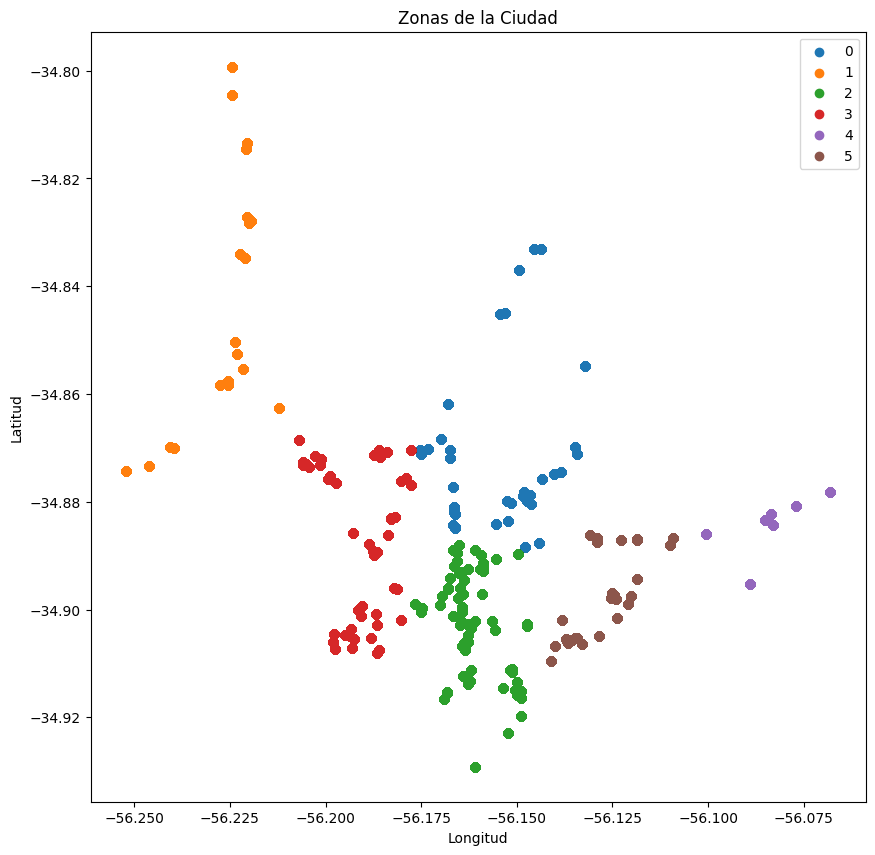

In [46]:
import matplotlib.pyplot as plt

data_transito_merge_filtrado['latitud'] = data_transito_merge_filtrado['latitud'].astype(float)
data_transito_merge_filtrado['longitud'] = data_transito_merge_filtrado['longitud'].astype(float)

fig, ax = plt.subplots(figsize=(10, 10))

colores = plt.cm.tab10.colors

for zona in range(6):
    datos_zona = data_transito_merge_filtrado[data_transito_merge_filtrado['zona'] == zona]
    ax.scatter(datos_zona['longitud'], datos_zona['latitud'], c=colores[zona], label=zona)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Zonas de la Ciudad')

plt.legend()

plt.show()
